In [1]:
import os, csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [40]:
SAVE_PATH = r"C:\Users\Michael Lee\Dropbox (MIT)\BLP Lab Files\Lab\Notebook\313 Notebook\313-152 CBP-1 Lib Sequencing Runs"
FILE = r"C:\Users\Michael Lee\Dropbox (MIT)\BLP Lab Files\Lab\Notebook\313 Notebook\313-152 CBP-1 Lib Sequencing Runs\Hot mCDH2 Full Output.csv"
name = 'mCDH2 Hot Lib Filtered'

In [41]:
data = []
with open(FILE, 'r') as file:
    csv_reader = csv.DictReader(file,delimiter=',')
    for row in csv_reader:
        data.append(row)

In [42]:
RTs = []
Escores = []
mzs = []
ps = []
zs = []
specs = []
for line in data:
    idx = line['Compound'].find('RTime:')
    Escores.append(float(line['Compound'][8:idx-1]))
    RTs.append(float(line['Compound'][idx+7:])/60)   # convert to mins
    mzs.append(float(line['m/z']))
    zs.append(float(line['z']))
    ps.append(float(line['p value']))
    specs.append(line['specificity'])
    
RT_ranges = [(max(3,RT - 10),min(RT+10,120)) for RT in RTs]   # method is 120 mins, MS on at 3 mins

### if using "inclusion list" file

# for line in data:
#     idx = line['Compound'].find('RTime:')
#     idx_e = line['Compound'].find('p value')
#     Escores.append(float(line['Compound'][8:idx_e-1]))
#     RTs.append(float(line['Compound'][idx+7:])/60)   # convert to mins
#     mzs.append(float(line['m/z']))
#     zs.append(float(line['z']))
#     ps.append(float(line['Compound'][idx_e+9:idx-1]))
    
# RT_ranges = [(max(3,RT - 10),min(RT+10,120)) for RT in RTs]   # method is 120 mins, MS on at 3 mins

In [43]:
dataframe = pd.DataFrame([Escores,RTs,mzs,zs,ps,specs]).transpose()
dataframe.columns = ['Escore','RT','mz','z','p','spec']
dataframe

,Escore,RT,mz,z,p,spec
0,1.0,38.983683,437.2207,3.0,1.0,Unclear
1,1.0,52.04715,395.6862,2.0,1.0,Unclear
2,1.0,79.646867,522.2471,2.0,1.0,Unclear
3,1.0,66.075017,463.2272,2.0,1.0,Unclear
4,1.0,38.151483,365.914,2.0,1.0,Unclear
...,...,...,...,...,...,...
12316,0.0,34.374367,424.6677,2.0,1.0,Unclear
12317,0.0,58.804083,397.652,2.0,1.0,Unclear
12318,0.0,29.759983,465.2195,3.0,1.0,Unclear
12319,0.0,45.04125,410.8827,3.0,1.0,Unclear


(array([  7.,   4.,   3.,   4.,   2.,   6.,   4.,   1.,   7.,   8.,   5.,
          4.,   4.,   9.,   4.,   7.,   4.,   5.,   7.,   5.,   4.,   2.,
          8.,  16.,   9.,  13.,  19.,  20.,  21.,  34.,  38.,  36.,  52.,
         55., 192.,   0., 111., 142., 147., 154., 405.,   0., 237., 296.,
        292., 356., 804.,   0., 491., 584., 604., 654., 766., 678., 587.,
        548., 857.,   0., 360., 313., 263., 254., 226., 202., 166., 134.,
        115.,  98., 163.,  62.,   0.,  72.,  49.,  41.,  29.,  28.,  27.,
         18.,  15.,  10.,  16.,  18.,   9.,   0.,   4.,   5.,   5.,   5.,
          7.,   4.,   3.,   3.,   2.,   4.,   4.,   0.,   7.,   7.,  22.,
        219.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.

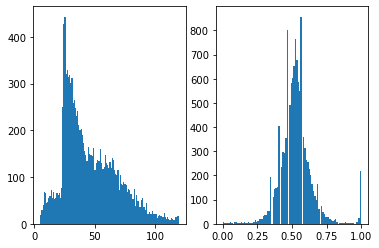

In [44]:
bins = 120

fig,axs = plt.subplots(1,2)
axs[0].hist(RTs,bins=bins)
axs[1].hist(Escores,bins=100)

In [45]:
# fig, axs = plt.subplots(1,1,figsize=(16,16))
# for i,pair in enumerate(RT_ranges):
#     axs.plot([pair[0],pair[1]],[mzs[i],mzs[i]])
#     axs.scatter(RTs[i],mzs[i], s=8)

In [46]:
RT_start = 3
RT_end = 120
n_bins = RT_end - RT_start + 1
peps_min = 1

hist,bins = np.histogram(RTs,bins=np.linspace(RT_start,RT_end,n_bins),density=False)
print(bins)
    
bin_members = np.digitize(RTs,bins=np.linspace(RT_start,RT_end,n_bins))
unique_members = np.unique(bin_members)
idxs_filtered = []
for member in unique_members:
    repeats = np.where(bin_members == member)[0]
    idxs = repeats.copy()
    scores_sub = [Escores[v] for v in repeats]
    if len(repeats) > peps_min:
        scores_sub_sorted = np.sort(scores_sub)   # sort from lowest to highest
        while len(scores_sub) > peps_min:
            delete = np.where(scores_sub == scores_sub_sorted[0])[0][0]
            scores_sub = np.delete(scores_sub,delete)
            idxs = np.delete(idxs,delete)
            scores_sub_sorted = np.delete(scores_sub_sorted,0)
    idxs_filtered.append(idxs)

[  3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.  16.
  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.
  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.
  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.
  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.  71.  72.
  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.  85.  86.
  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.  99. 100.
 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112. 113. 114.
 115. 116. 117. 118. 119. 120.]


In [47]:
idxs_flattened = [val for sublist in idxs_filtered for val in sublist]
RTs_filtered = [RTs[i] for i in idxs_flattened]
Escores_filtered = [Escores[i] for i in idxs_flattened]
mzs_filtered = [mzs[i] for i in idxs_flattened]
zs_filtered = [zs[i] for i in idxs_flattened]
ps_filtered = [ps[i] for i in idxs_flattened]
t_starts = [RT - 10 for RT in RTs_filtered]
t_ends = [RT + 10 for RT in RTs_filtered]

(array([2., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 2., 0.,
        1., 1., 1., 1., 2., 1., 0., 1., 0., 2., 1., 0., 2., 1., 1., 1., 0.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 2., 1., 0., 1., 2.,
        1., 1., 0., 1., 1., 2., 1., 0., 1., 1., 1., 1., 0., 2., 1., 0., 2.,
        1., 0., 1., 1., 2., 1., 0., 1., 2., 1., 1., 1., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 1., 1., 1., 2., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 2., 0., 1., 1., 1., 1., 1.,
        2.]),
 array([  5.36573333,   6.31284875,   7.25996417,   8.20707958,
          9.154195  ,  10.10131042,  11.04842583,  11.99554125,
         12.94265667,  13.88977208,  14.8368875 ,  15.78400292,
         16.73111833,  17.67823375,  18.62534917,  19.57246458,
         20.51958   ,  21.46669542,  22.41381083,  23.36092625,
         24.30804167,  25.25515708,  26.2022725 ,  27.14938792,
         28.09650333,  29.04361875,  29.99073417,  30.93784958,
      

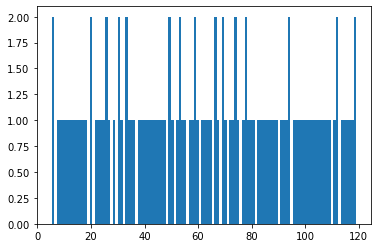

In [48]:
plt.hist(RTs_filtered,bins=120)

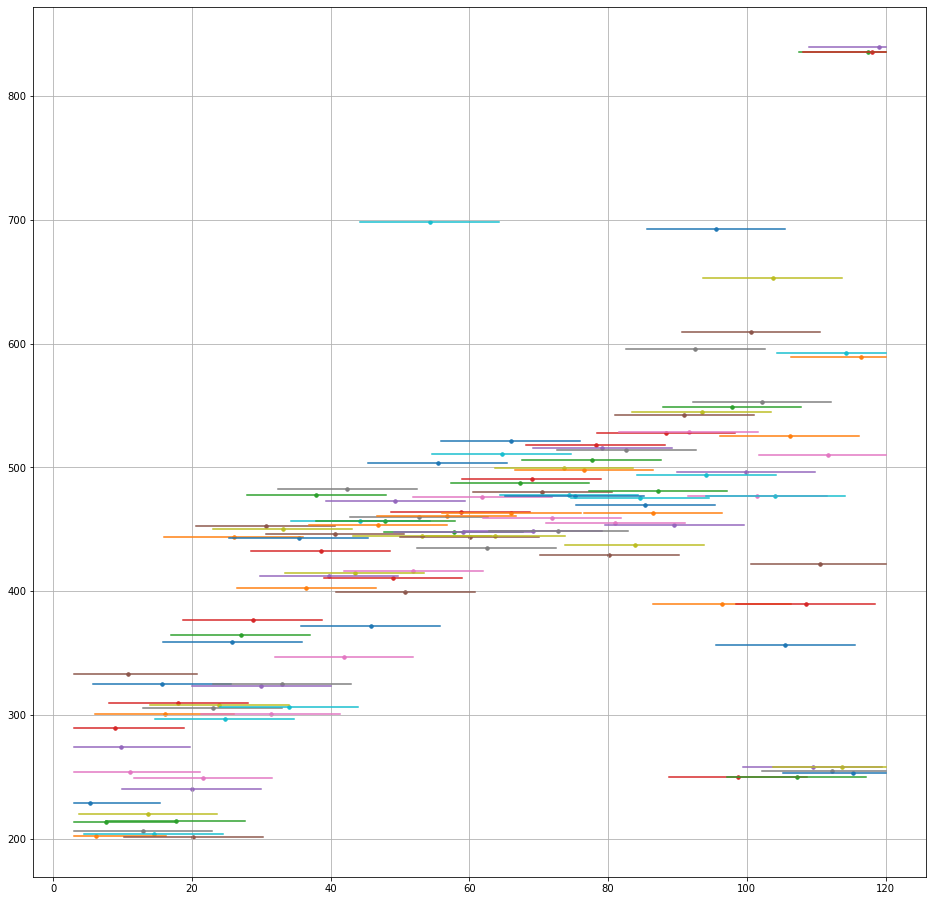

In [49]:
fig, axs = plt.subplots(1,1,figsize=(16,16))
RT_ranges_filtered = [(max(3,RT - 10),min(RT+10,120)) for RT in RTs_filtered]   # method is 120 mins, MS on at 3 mins
for i,pair in enumerate(RT_ranges_filtered):
    axs.plot([pair[0],pair[1]],[mzs_filtered[i],mzs_filtered[i]])
    axs.scatter(RTs_filtered[i],mzs_filtered[i], s=12)
    axs.grid()

(array([ 1.,  0.,  3.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  3.,  0.,  0.,
         2.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  4.,  0.,
         0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  3.,  0.,  0.,  1.,  0.,  2.,  0.,  0.,  2.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         2.,  0.,  0.,  5.,  0.,  0.,  3.,  0., 69.]),
 array([0.63  , 0.6337, 0.6374, 0.6411, 0.6448, 0.6485, 0.6522, 0.6559,
        0.6596, 0.6633, 0.667 , 0.6707, 0.6744, 0.6781, 0.6818, 0.6855,
        0.6892, 0.6929, 0.6966, 0.7003, 0.704 , 0.7077, 0.7114, 0.7151,
        0.7188, 0.7225, 0.7262, 0.7299, 0.7336, 0.7373, 0.741 , 0.7447,
        0.7484, 0.7521, 0.7558, 0.7595, 0.7632, 0.7669, 0.7706, 0.7743,
        0.778 , 0.7817, 0.7854, 0.7891, 0.7928, 0.7965, 0.8002, 0.8039,
  

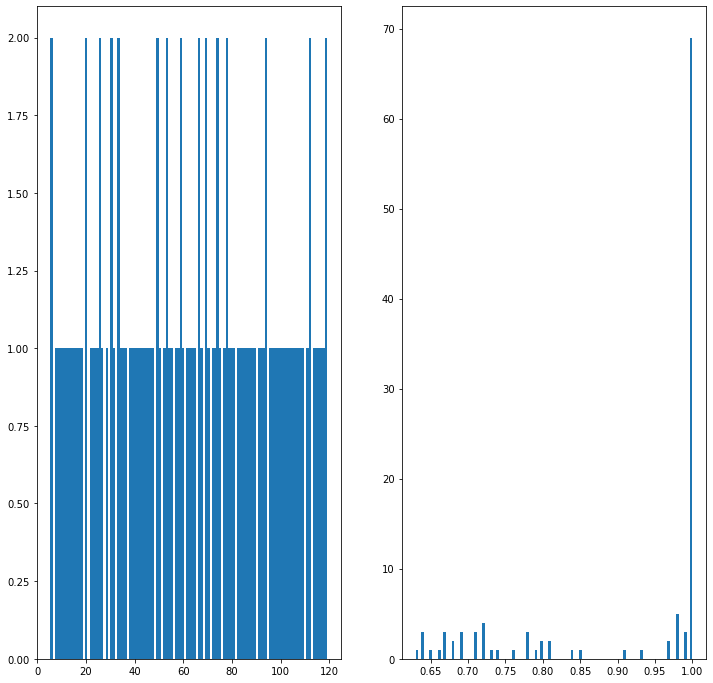

In [53]:
bins = 120

fig,axs = plt.subplots(1,2,figsize=(12,12))
axs[0].hist(RTs_filtered,bins=bins)
axs[1].hist(Escores_filtered,bins=100)

In [50]:
print(len(RTs),len(RTs_filtered))

12321 115


In [51]:
df = pd.DataFrame(columns=('Compound', 'Formula','Adduct','m/z','z','t start (min)','t stop (min)'))
for j in range(len(Escores_filtered)):
    A = 'EScore: ' + str(np.round(Escores_filtered[j],2)) + ' p value: ' + "{:.3e}".format(ps_filtered[j]) + ' RTime: ' + str(np.round(RTs_filtered[j],3))
    B = None
    C = '(no adduct)'
    D = np.round(mzs_filtered[j],4)
    E = int(zs_filtered[j])
    F = max(0,int(RTs_filtered[j] - 10))
    G = min(int(RTs_filtered[j] + 10),120)
    df.loc[j] = [A,B,C,D,E,F,G]
df.to_csv(os.path.join(SAVE_PATH,name + '.csv'),index=False)